In [1]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [2]:
# evalys requires pandas==0.25.3
# %matplotlib inline
from pandas import read_csv
import matplotlib
from evalys.jobset import JobSet

In [3]:
# input_location = 'KTH-1000-gauss/backfill-1'
input_location = 'out'

In [4]:
schedule = read_csv('../output/' + input_location + '_schedule.csv')
schedule.T

,0
batsim_version,3.1.0
consumed_joules,0
makespan,1.08795e+06
max_slowdown,64146
max_turnaround_time,429159
max_waiting_time,334464
mean_slowdown,2264.81
mean_turnaround_time,68411.1
mean_waiting_time,64117.8
nb_computing_machines,109


In [5]:
js = JobSet.from_csv('../output/' + input_location + '_jobs.csv')
js.df.drop(['consumed_energy', 'metadata'], axis=1, inplace=True)
df = js.df.sort_values(by=['submission_time'])
df

,jobID,workload_name,profile,submission_time,requested_number_of_resources,requested_time,success,final_state,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,allocated_resources,consumed_energy,metadata,proc_alloc
65,15,w0,15,1.0,4,53940.0,1,COMPLETED_SUCCESSFULLY,1.000000,3477.000150,3478.000150,0.000000,3477.000150,1.000000,"[0, 18, 28, 38]",-1.0,NaN,4
76,16,w0,16,173.0,25,3600.0,1,COMPLETED_SUCCESSFULLY,173.000000,2488.000200,2661.000200,0.000000,2488.000200,1.000000,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21...",-1.0,NaN,25
87,17,w0,17,627.0,5,215400.0,1,COMPLETED_SUCCESSFULLY,627.000000,215337.000250,215964.000250,0.000000,215337.000250,1.000000,"[32, 33, 34, 35, 36]",-1.0,NaN,5
98,18,w0,18,987.0,17,36000.0,1,COMPLETED_SUCCESSFULLY,987.000000,35373.000200,36360.000200,0.000000,35373.000200,1.000000,"[37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 5...",-1.0,NaN,17
109,19,w0,19,4081.0,8,2400.0,1,COMPLETED_SUCCESSFULLY,4081.000000,29.000150,4110.000150,0.000000,29.000150,1.000000,"[0, 18, 28, 38, 48, 58, 68, 78]",-1.0,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1010,w0,1010,793416.0,2,300.0,1,COMPLETED_SUCCESSFULLY,793416.000000,30.000200,793446.000200,0.000000,30.000200,1.000000,"[6, 7]",-1.0,NaN,2
13,1011,w0,1011,793697.0,1,2700.0,1,COMPLETED_SUCCESSFULLY,793697.000000,2648.000000,796345.000000,0.000000,2648.000000,1.000000,[69],-1.0,NaN,1
14,1012,w0,1012,795458.0,4,600.0,1,COMPLETED_SUCCESSFULLY,796345.000100,4.323532,796349.323632,887.000100,891.323632,206.156369,"[6, 7, 8, 9]",-1.0,NaN,4
15,1013,w0,1013,797601.0,1,21600.0,1,COMPLETED_SUCCESSFULLY,797601.000000,18256.000000,815857.000000,0.000000,18256.000000,1.000000,[69],-1.0,NaN,1


In [6]:
js.df.describe()

,submission_time,requested_number_of_resources,requested_time,success,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,consumed_energy,metadata,proc_alloc
count,1000.000000,1000.000000,1000.000000,1000.000000,9.930000e+02,993.000000,9.930000e+02,993.000000,993.000000,993.000000,993.0,0.0,1000.000000
mean,331702.810000,10.440000,6729.300000,0.961000,3.944248e+05,4323.572943,3.987484e+05,64569.791685,68893.364628,2280.779872,-1.0,NaN,9.868000
std,225300.048046,15.457469,19764.430784,0.193692,2.656734e+05,17310.722117,2.680554e+05,77627.989019,81566.764375,7178.794606,0.0,NaN,14.273974
min,1.000000,1.000000,60.000000,0.000000,1.000000e+00,2.000000,2.661000e+03,0.000000,2.000000,1.000000,-1.0,NaN,0.000000
25%,169562.750000,2.000000,180.000000,1.000000,2.305700e+05,20.000200,2.309720e+05,0.000000,502.000000,1.000000,-1.0,NaN,2.000000
50%,280651.500000,4.000000,600.000000,1.000000,2.966360e+05,54.000200,2.966840e+05,32998.004950,35286.007300,37.202442,-1.0,NaN,4.000000
75%,522195.750000,10.000000,3600.000000,1.000000,6.333751e+05,867.000000,6.346971e+05,110551.175867,113358.776139,1013.191631,-1.0,NaN,10.000000
max,797845.000000,84.000000,215400.000000,1.000000,1.074567e+06,215337.000250,1.087954e+06,334464.371166,429158.929786,64146.031197,-1.0,NaN,84.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f2c437c0>,
      dtype=object)

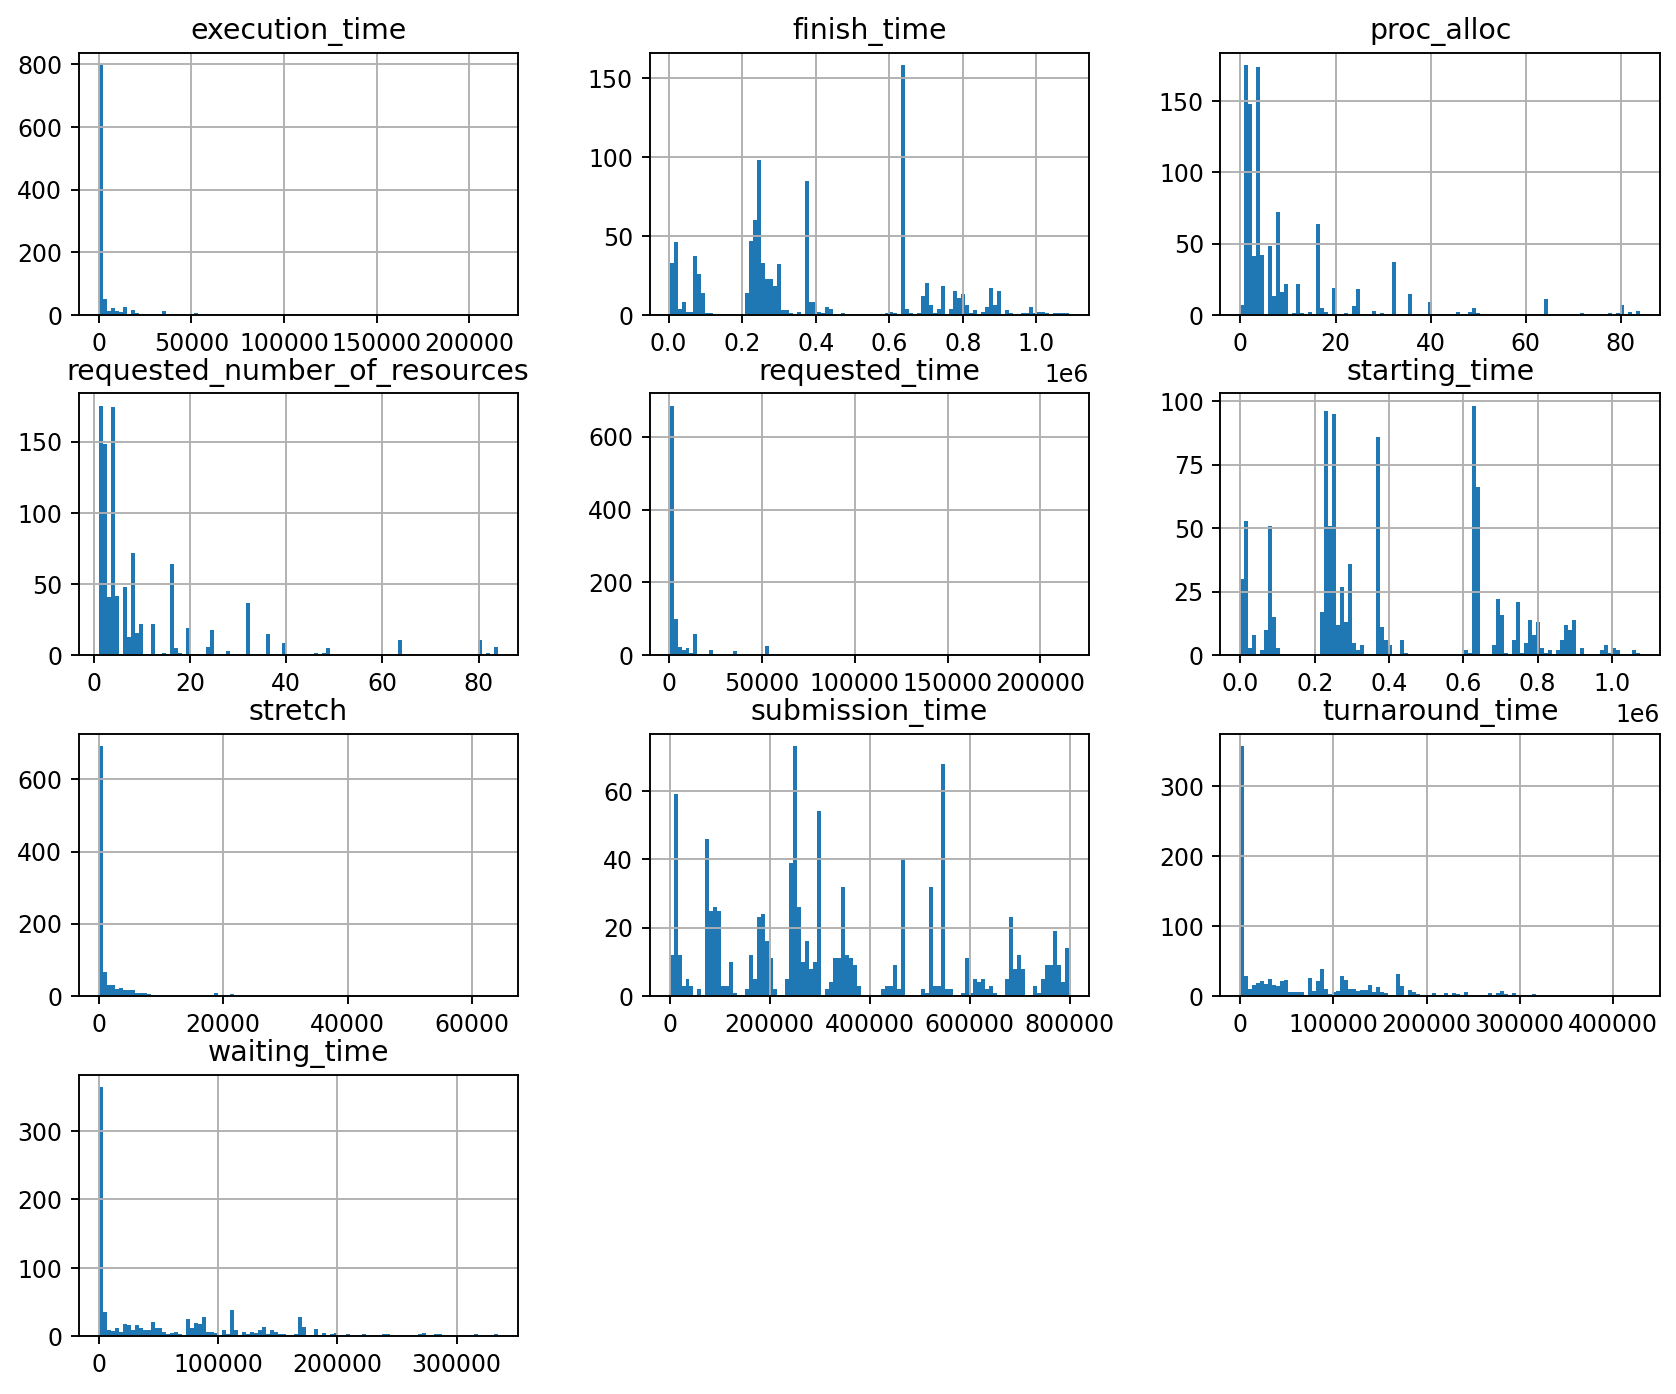

In [17]:
matplotlib.rcParams['figure.dpi']= 170
df = js.df.drop(['success'], axis=1)
df.hist(figsize=(12, 10), bins=100)

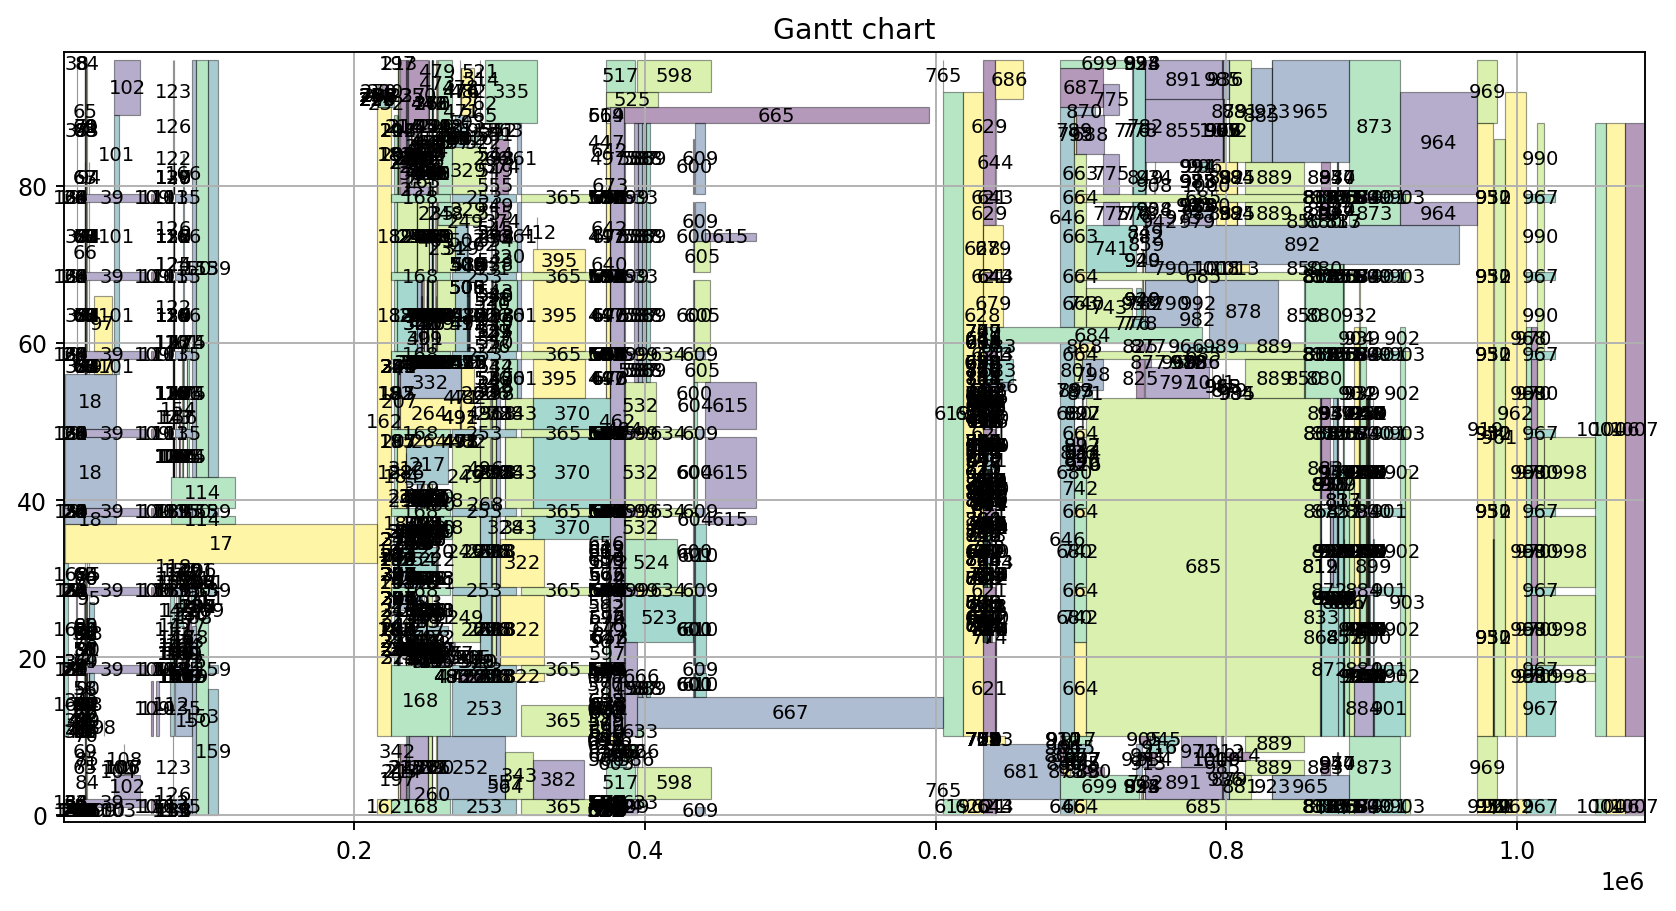

In [22]:
matplotlib.rcParams['figure.figsize'] = 12, 6
matplotlib.rcParams['figure.dpi']= 170
js.gantt()

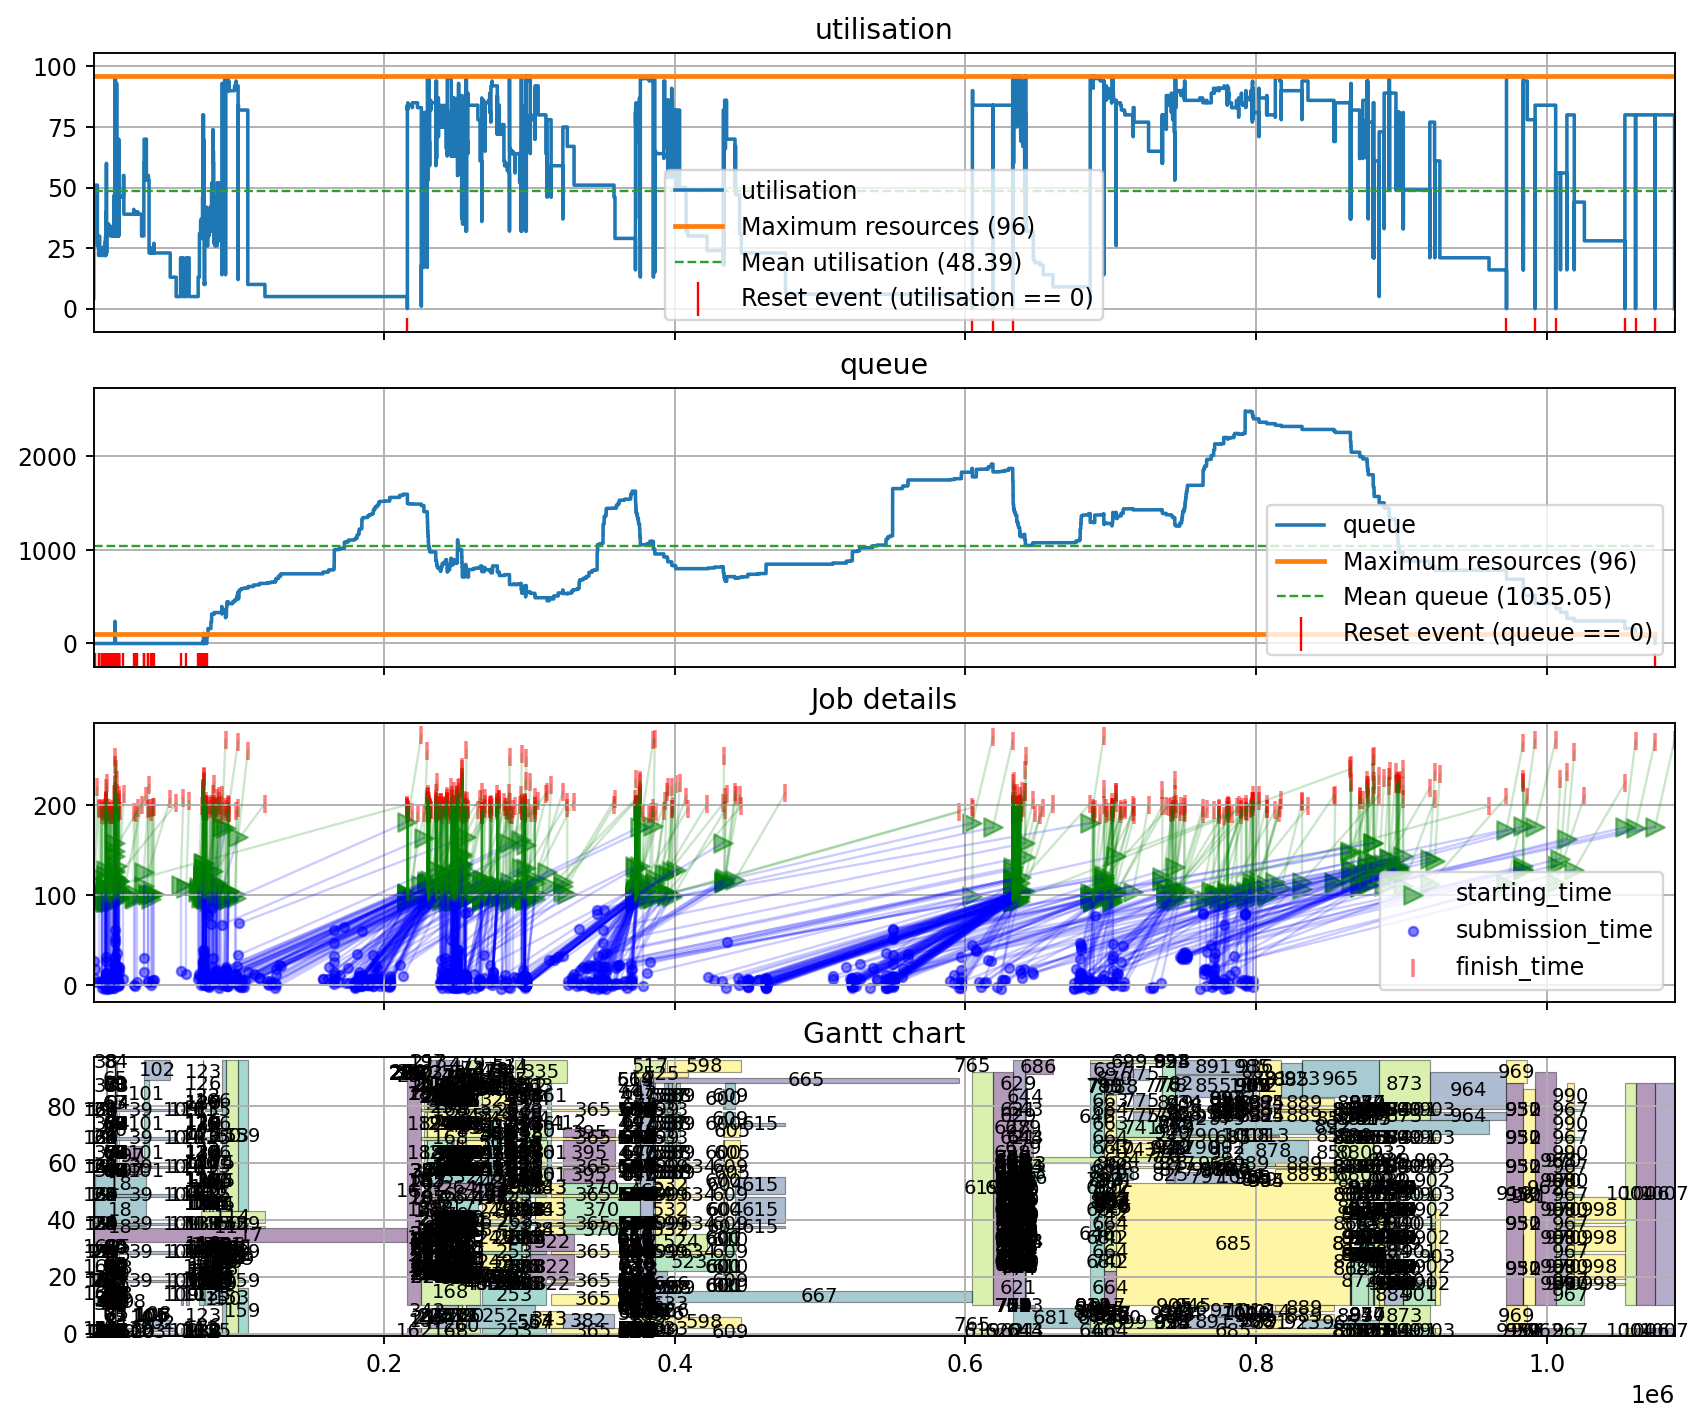

In [23]:
matplotlib.rcParams['figure.figsize'] = 12, 10
matplotlib.rcParams['figure.dpi']= 170
js.plot(with_details=True)